# Vectorization: Compare Loop vs. Vectorized Operations

<figure>
    <center> <img src="../../../assets/images/vectorization.png"  alt='missing' width="1000"  ><center/>
<figure/>

Numpy faster than pure python loops. Because:
- numpy uses optimized C and Fortran libraries under the hood,
- it call kernel C &rarr; continuous memory block &rarr; CPU cache friendly &rarr; SIMD instructions &rarr; parallel processing.

Example:
+ Python list:
```
[a] ─▶ ptr ─▶ obj(1)
    ├▶ ptr ─▶ obj(2)
    └▶ ptr ─▶ obj(3)
```

+ Numpy array:
```
[a.data] ─▶ [ 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 ]
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# NUM_ITERS = 1000000 # 1.000.000
# NUM_ITERS = 10000000 # 10.000.000
NUM_ITERS = 100000000 # 100.000.000


In [56]:
# Create 2 numpy array have NUM_ITERS elements
vec1 = np.random.rand(NUM_ITERS)
vec2 = np.random.rand(NUM_ITERS)

# Create 2 array have NUM_ITERS elements
arr1 = [random.random() for _ in range(NUM_ITERS)]
arr2 = [random.random() for _ in range(NUM_ITERS)]

print(vec1.shape)
print(len(arr1))

(100000000,)
100000000


In [57]:
# Calculate time:
starttime_vec = time.perf_counter()
vec_multi_res = np.dot(vec1, vec2)
endtime_vec = time.perf_counter()
vec_running_time = endtime_vec - starttime_vec

starttime_arr = time.perf_counter()
arr_multi_res = 0
for i in range(NUM_ITERS):
    arr_multi_res += arr1[i] * arr2[i]
endtime_arr = time.perf_counter()
arr_running_time = endtime_arr - starttime_arr

print(f"- (vec) Result: {vec_multi_res:.4f} \t|\t Time: {vec_running_time:.4f}")
print(f"- (arr) Result: {arr_multi_res:.4f} \t|\t Time: {arr_running_time:.4f}")

- (vec) Result: 24999161.0032 	|	 Time: 0.9722
- (arr) Result: 25001806.1270 	|	 Time: 22.1941


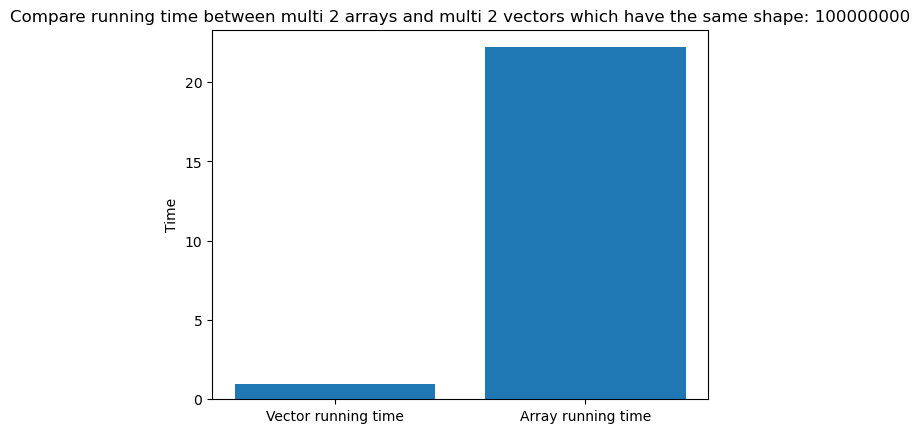

In [58]:
data = [vec_running_time, arr_running_time]
plt.bar(x=["Vector running time", "Array running time"], height=data)
plt.ylabel("Time")
plt.title(f"Compare running time between multi 2 arrays and multi 2 vectors which have the same shape: {NUM_ITERS}")
plt.show();

---

### The end